# Hyp Testing Section

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

  ### Has the network latency gone up since we switched internet service providers?

- value: latency
- condition: latency before change, latency after change

  h0 = There is no difference between the latency in internet from the old to the new service
  
  ha = There is a diff between the latecy of internet now than the latency from before we switched
  


  * True Positive ==> There was a diff in latency and the diff in lat was indeed true
  * True Negative ==> No diff in latency and there was in fact no diff in latency / did not reject h0 and h0 was true
  * type I ==> there was a diff in lat, but there was no diff in latency
  * type II ==> there was no diff in latency but there was a diff



### Is the website redesign any good?

- engagement score for traffic to website

h0 = No diff in engagement from the old design to the new design

ha = There is a measurable increase in engagement since the redesign

* True Positive ==> There was an increase since the redesign so we rejected the null 
* True Negative ==> No change or less engagement and it did not increase
* type I ==> Said there was an increase but there wasnt
* type II ==> engagement was the same or less than before but it actually increased


### Is our television ad driving more sales?

h0 = new_sales no diff or less than old_sales before ad

ha = new_sales > it was before running the add

* True Positive ==> sales avg has increased, and we said that it increased
* True Negative ==> there was no change or less and that was actually the case
* type I ==> sales were greater now but we said the did not change or were less
* type II ==> said that sales were the same or less than they were before, but are actually increased now since the ad


# Correlation Exercise

1. Answer with the type of stats test you would use (assume normal distribution):

    

* Is there a relationship between the length of your arm and the length of your foot?
    

In [273]:
# use pearson's r

* Does smoking affect when or not someone has lung cancer?
    

In [274]:
# chi-squared

* Is gender independent of a person’s blood type?
    

In [275]:
# chi-squared

* Does whether or not a person has a cat or dog affect whether they live in an apartment?
    

In [276]:
# chi-squared

* Does the length of time of the lecture correlate with a student's grade?



In [277]:
# pearson's r

2. Use the telco_churn data.

    * Does tenure correlate with monthly charges?
    * Total charges?
    * What happens if you control for phone and internet service?



In [278]:
import env
import pandas as pd
import numpy as np
from sqlalchemy import text, create_engine
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [279]:
db = 'telco_churn'
engine = create_engine(env.get_db_url(db))
query = text('select * from customers')
tco_df = pd.read_sql(query, engine.connect())
tco_df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,Yes,No,No,2,No,2,55.15,742.9,No
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,No,No,Yes,1,Yes,1,85.10,1873.7,Yes
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,No,No,1,Yes,2,50.30,92.75,No
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,Yes,No,Yes,3,No,2,67.85,4627.65,No


In [280]:
# Does tenure correlate with monthly charges
ten_cust = tco_df[['tenure', 'monthly_charges']]

$H_0$: there is no linear correlation between tenure and monthly charges

$H_a$: there is linear correlation beteween tenure and monthly charges

In [281]:
ten_cust

,tenure,monthly_charges
0,9,65.60
1,9,59.90
2,4,73.90
3,13,98.00
4,3,83.90
...,...,...
7038,13,55.15
7039,22,85.10
7040,2,50.30
7041,67,67.85


In [282]:
x = ten_cust.tenure
y = ten_cust.monthly_charges
alpha = 0.05
# h0

<Axes: xlabel='tenure', ylabel='monthly_charges'>

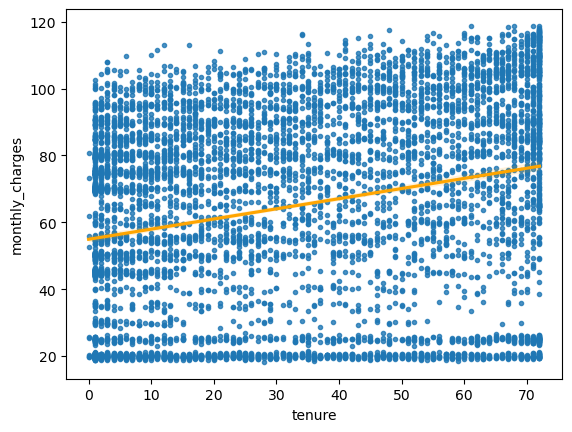

In [283]:
#tenure vs monthly charges
sns.regplot(x='tenure', y='monthly_charges', data = ten_cust, marker='.', line_kws={'color' : 'orange'})

In [284]:
def eval_dist(r,p,alpha=0.05):
    if p>alpha:
        return print(f'''The data is normally distributed''')
    else:
        return print(f'''The data is NOT normally distributed''')

In [285]:
from scipy.stats import shapiro

In [286]:
r, p = stats.shapiro(tco_df.monthly_charges)
r, p

/opt/homebrew/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9208889007568359, 0.0)

In [287]:
eval_dist(r,p)

The data is NOT normally distributed


In [288]:
r,p = stats.shapiro(tco_df.tenure)
r, p

(0.9037512540817261, 0.0)

In [289]:
eval_dist(r,p)

The data is NOT normally distributed


In [290]:
sr,sp = stats.spearmanr(ten_cust.tenure, ten_cust.monthly_charges)
sr,sp

(0.27641678933130215, 1.0271266876409408e-123)

In [291]:
def eval_Sresult(r, p, α=0.05):
    if p < α:
        return print(f"""Reject the null hypothesis. There is a linear correlation.
Spearman’s r: {r:2f}
P-value: {p}""")
    else:
        return print(f"""We fail to reject the null hypothesis that there is a linear correlation.
Spearman’s r: {r:2f}
P-value: {p}""")

In [292]:
eval_Sresult(sr,sp)

Reject the null hypothesis. There is a linear correlation.
Spearman’s r: 0.276417
P-value: 1.0271266876409408e-123


In [293]:
ttl_charges_df = tco_df[['tenure', 'total_charges']]

In [294]:
ttl_charges_df['total_charges']= ttl_charges_df['total_charges'].str.replace(' ', '0').astype('float')

/var/folders/mj/fstq2n8s1gs942htzygkxlj40000gn/T/ipykernel_10740/309502529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttl_charges_df['total_charges']= ttl_charges_df['total_charges'].str.replace(' ', '0').astype('float')


In [297]:
ttl_charges_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tenure         7043 non-null   int64  
 1   total_charges  7043 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 110.2 KB


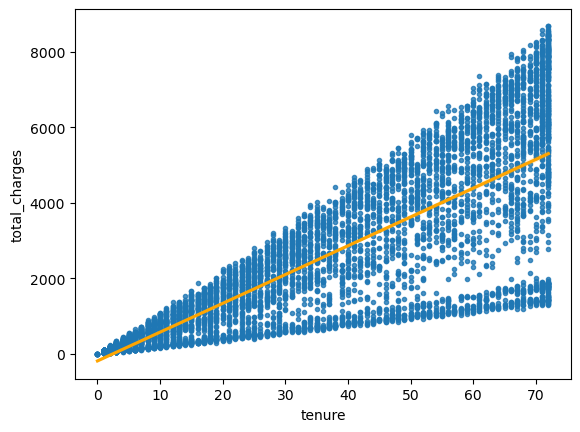

In [298]:
sns.regplot(x='tenure', y = 'total_charges', data=ttl_charges_df, marker='.', line_kws={'color': 'orange'})
plt.show()

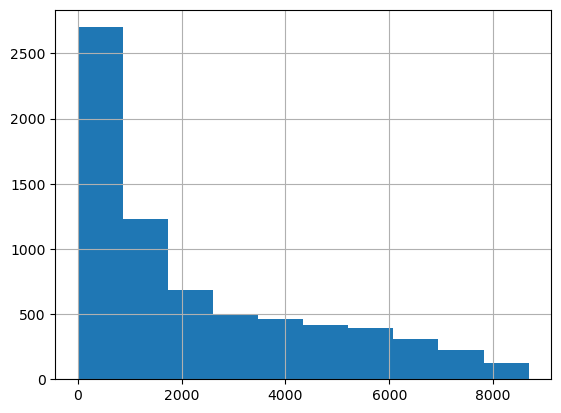

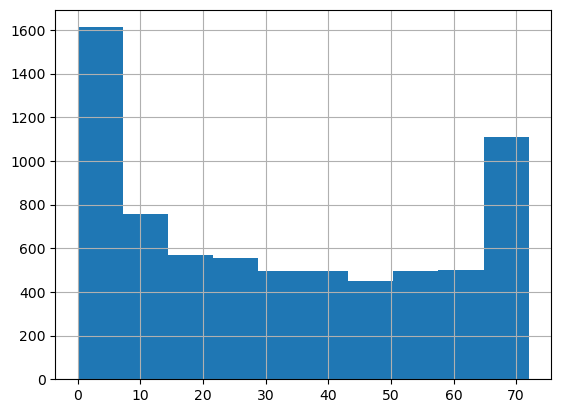

In [299]:
#visual check for distribution of total charges
ttl_charges_df.total_charges.hist()
plt.show()

#visual check for distribution of tenure
ttl_charges_df.tenure.hist()
plt.show()

In [300]:
#get r and p values using stats library
r,p = stats.shapiro(ttl_charges_df.total_charges)

#see those values
r,p

/opt/homebrew/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.8601521253585815, 0.0)

In [301]:
eval_dist(r,p)

The data is NOT normally distributed


In [303]:
sr,sp = stats.spearmanr(ttl_charges_df.tenure, ttl_charges_df.total_charges)
sr,sp

(0.8896957900597577, 0.0)

In [304]:
eval_Sresult(sr,sp)

Reject the null hypothesis. There is a linear correlation.
Spearman’s r: 0.889696
P-value: 0.0


<b>Step 1: State Hypothesis & Set $\alpha$</b>

Of customers who have only phone service:
- $H_0$: There is no linear correlation between tenure and monthly charges of phone & internet customers
- $H_a$: There is a linaer correlation between tenure and monthly charges of phone & internet customers

In [306]:
phone_df = tco_df[(tco_df.phone_service == "Yes") & (tco_df.internet_service_type_id == 1)][['monthly_charges', 'tenure']]

In [307]:
phone_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1739 entries, 0 to 7041
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   monthly_charges  1739 non-null   float64
 1   tenure           1739 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 40.8 KB


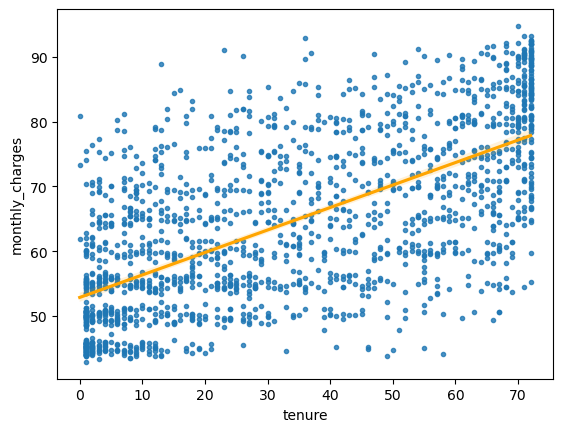

In [308]:
sns.regplot(x='tenure', y = 'monthly_charges', data=phone_df, marker='.', line_kws={'color': 'orange'})
plt.show()

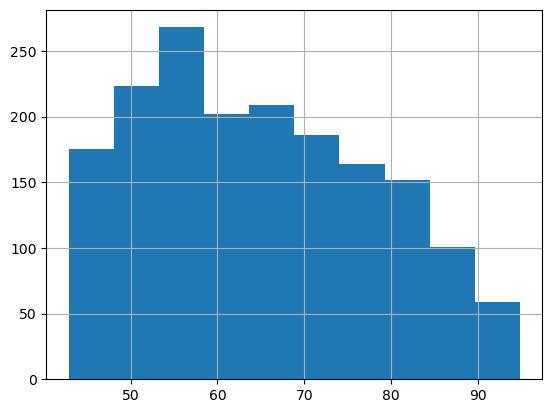

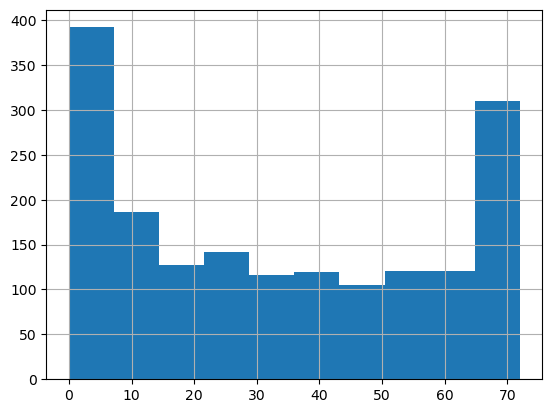

In [309]:
phone_df.monthly_charges.hist()
plt.show()
phone_df.tenure.hist()
plt.show()

In [310]:
#shapiro for monthly charges
r,p = stats.shapiro(phone_df.monthly_charges)

#see those values
r,p

(0.9584369659423828, 7.019588771857106e-22)

In [311]:
eval_dist(r,p)

The data is NOT normally distributed


In [312]:
#shapiro for tenure
r,p = stats.shapiro(phone_df.tenure)

#see those values
r,p

(0.8991788029670715, 2.3523856297437335e-32)

In [313]:
#using the function we created
eval_dist(r,p)

The data is NOT normally distributed


In [314]:
sr,sp = stats.spearmanr(phone_df.tenure, phone_df.monthly_charges)
sr,sp

(0.6644708508462759, 5.423601644635052e-222)

In [315]:
eval_Sresult(r,p)

Reject the null hypothesis. There is a linear correlation.
Spearman’s r: 0.899179
P-value: 2.3523856297437335e-32


3. Use the employees database.

    * Is there a relationship between how long an employee has been with the company and their salary?
    * Is there a relationship between how long an employee has been with the company and the number of titles they have had?



In [ ]:
from datetime import date
now = date.today()
now

datetime.date(2023, 8, 7)

In [ ]:
db = 'employees'
engine = create_engine(env.get_db_url(db))
query = text('select * from employees join salaries using (emp_no) join titles using (emp_no) where salaries.to_date > now() and titles.to_date > now()')
emp_df = pd.read_sql(query, engine.connect())
emp_df

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,Senior Engineer,1995-12-01,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01,Senior Staff,1996-09-12,9999-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
240119,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12,52868,2002-06-01,9999-01-01,Engineer,1997-06-02,9999-01-01
240120,499996,1953-03-07,Zito,Baaz,M,1990-09-27,69501,2002-05-12,9999-01-01,Senior Engineer,2002-05-13,9999-01-01
240121,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,83441,2001-08-26,9999-01-01,Senior Engineer,1992-08-29,9999-01-01
240122,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,55003,2001-12-25,9999-01-01,Senior Staff,1998-12-27,9999-01-01


In [ ]:
# Needed to convert the datetime to float for amount of time employee was at company
# With new column
emp_df['emp_tenure'] = now - emp_df.hire_date
emp_df['emp_tenure'] = emp_df['emp_tenure'].astype(str)
emp_df['emp_tenure'] = emp_df['emp_tenure'].str.replace(' days, 0:00:00', '')
emp_df['emp_tenure'] = emp_df['emp_tenure'].astype(float)
emp_df

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,title,from_date,to_date,emp_tenure
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01,Senior Engineer,1986-06-26,9999-01-01,13556.0
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01,Staff,1996-08-03,9999-01-01,13773.0
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01,Senior Engineer,1995-12-03,9999-01-01,13493.0
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,Senior Engineer,1995-12-01,9999-01-01,13398.0
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01,Senior Staff,1996-09-12,9999-01-01,12382.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240119,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12,52868,2002-06-01,9999-01-01,Engineer,1997-06-02,9999-01-01,11164.0
240120,499996,1953-03-07,Zito,Baaz,M,1990-09-27,69501,2002-05-12,9999-01-01,Senior Engineer,2002-05-13,9999-01-01,12002.0
240121,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,83441,2001-08-26,9999-01-01,Senior Engineer,1992-08-29,9999-01-01,13622.0
240122,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,55003,2001-12-25,9999-01-01,Senior Staff,1998-12-27,9999-01-01,10890.0


In [ ]:
emp_sal = emp_df[['emp_tenure', 'salary']]

In [ ]:
x = emp_sal.emp_tenure
y = emp_sal.salary.astype(float)

In [ ]:
r, p = stats.pearsonr(x, y)

In [ ]:
r

0.3064625613186014

In [ ]:
p

0.0

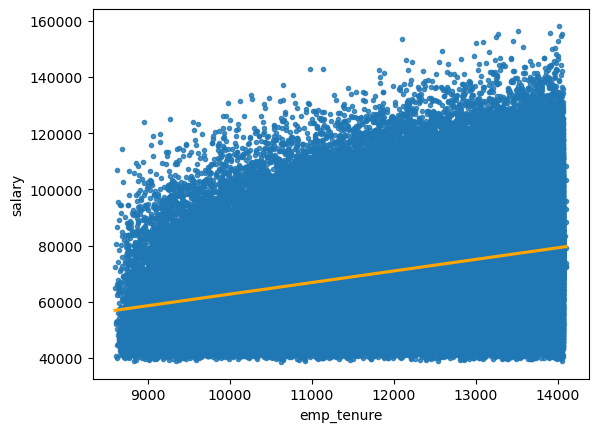

In [317]:
sns.regplot(x='emp_tenure', y = 'salary', data=emp_sal, marker='.', line_kws={'color': 'orange'})
plt.show()

In [ ]:
r, p = stats.shapiro(emp_sal.emp_tenure)
r, p

/opt/homebrew/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9476065635681152, 0.0)

In [318]:
eval_dist(r,p)

The data is NOT normally distributed


In [319]:
#shapiro for salary
r,p = stats.shapiro(emp_sal.salary)

#see those values
r,p

/opt/homebrew/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.968895435333252, 0.0)

In [320]:
eval_dist(r,p)

The data is NOT normally distributed


In [ ]:
sr, sp = stats.spearmanr(emp_sal.emp_tenure, emp_sal.salary)
sr, sp

(0.3128783525010577, 0.0)

In [321]:
eval_Sresult(sr,sp)

Reject the null hypothesis. There is a linear correlation.
Spearman’s r: 0.664471
P-value: 5.423601644635052e-222


<b>Step 1: State Hypothesis & Set $\alpha$</b>
- $H_0$: There is no correlation between tenure and number of titles
- $H_a$: There is a correlation between tenure and number of titles

In [323]:
#set sql query
query = '''
select 
    t.emp_no, 
    count(t.title) AS num_titles, 
    te.tenure
from titles t
join (select 
        emp_no, 
        datediff(now(), min(from_date)) AS tenure 
      from titles
      group by emp_no
      having max(to_date) = '9999-01-01') te 
on t.emp_no = te.emp_no
group by t.emp_no;        
'''

In [325]:
db = 'employees'
engine = create_engine(env.get_db_url(db))

df = pd.read_sql(query, engine.connect())
df

,emp_no,num_titles,tenure
0,10001,1,13557
1,10002,1,9866
2,10003,1,10110
3,10004,2,13399
4,10005,2,12383
...,...,...,...
240119,499995,1,9563
240120,499996,2,9948
240121,499997,2,13127
240122,499998,2,10816


In [326]:
df = df[['num_titles', 'tenure']]

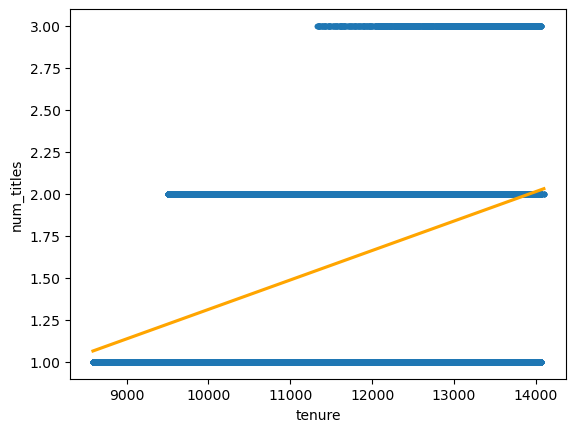

In [327]:
sns.regplot(x='tenure', y = 'num_titles', data=df, marker='.', line_kws={'color': 'orange'})
plt.show()

In [328]:
df.num_titles.value_counts()

num_titles
2    125345
1    111892
3      2887
Name: count, dtype: int64

In [329]:
stats.levene(df.num_titles, df.tenure)

LeveneResult(statistic=718602.1569097865, pvalue=0.0)

In [330]:
stats.kruskal(df.num_titles, df.tenure)

KruskalResult(statistic=371488.64419334417, pvalue=0.0)

<Axes: title={'center': 'tenure'}, xlabel='num_titles'>

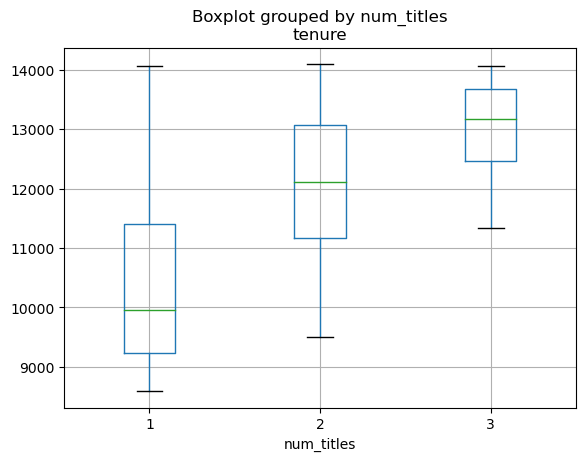

In [331]:
df.boxplot('tenure', by='num_titles')


<b>Takeaways:</b> 
<br>
We reject $H_0$, the tenure median is not equal for the various number of titles.


There is a difference in tenure and number of titles an employee has held.

# 4. Use the sleepstudy data.
    * Is there a relationship between days and reaction time?

In [ ]:
from pydataset import data


In [ ]:
# Need to import sleepstudy
sleep_df = data('sleepstudy')
sleep_df

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


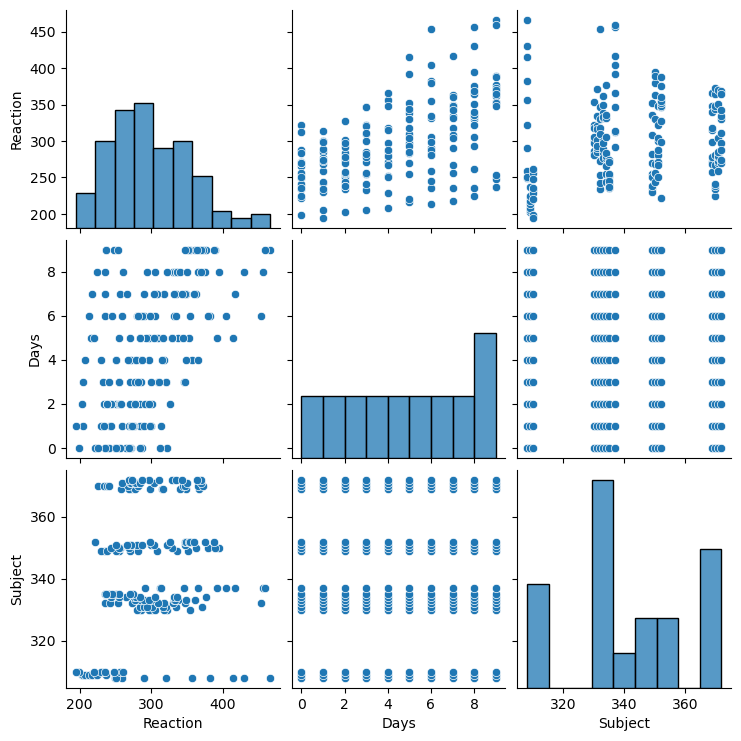

In [ ]:
sns.pairplot(sleep_df)

In [ ]:
x = sleep_df.Days
y = sleep_df.Reaction

In [ ]:
r, p = stats.pearsonr(x, y)

In [ ]:
(r , p)

(0.5352302262650255, 9.894096322214486e-15)

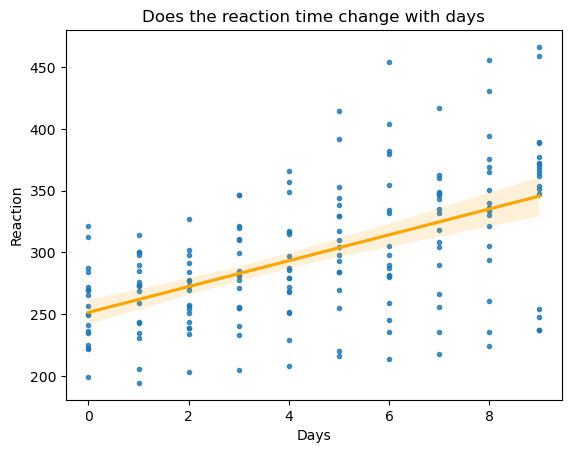

In [333]:
sns.regplot(data=sleep_df, x='Days', y='Reaction', marker='.', line_kws=({'color': 'orange'}))

plt.title('Does the reaction time change with days')
plt.show()

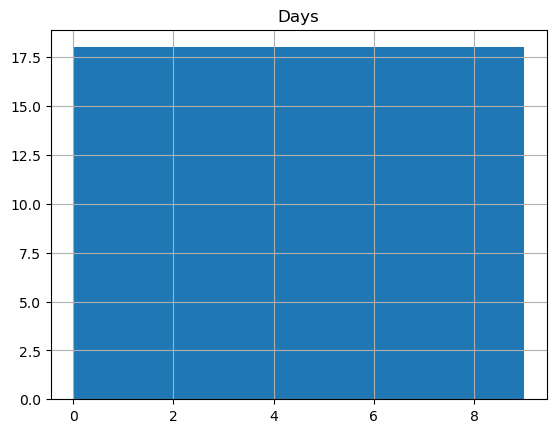

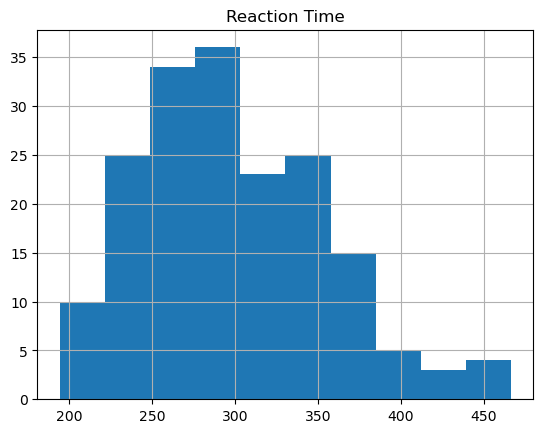

In [334]:
#visualize the distribution of days
sleep_df.Days.hist()
plt.title('Days')
plt.show()

#visualize the distribution of reaction time
sleep_df.Reaction.hist()
plt.title('Reaction Time')
plt.show()

In [336]:
r, p = stats.spearmanr(sleep_df.Reaction, sleep_df.Days)
r, p

(0.5228138502259547, 5.132878057706873e-14)

In [337]:
eval_Sresult(r,p)

Reject the null hypothesis. There is a linear correlation.
Spearman’s r: 0.522814
P-value: 5.132878057706873e-14


# Comparison of Means Exercises

1. Answer with the type of test you would use (assume normal distribution):

* Is there a difference in grades of students on the second floor compared to grades of all students?

What variables am I testing?
        - grades of students
What type of variable is that
        - Continuous
Is there a 2nd var im comparing grades to
        - No, I;m just comparing grades on their face
Based on that much:
        - means Test


        One samp, Two Tailed T-Test


* Are adults who drink milk taller than adults who don't drink milk?

        t-test(2samp, 1 tailed)


* Is the price of gas higher in Texas or in New Mexico?

        2 samp 1-tail t-test

* Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

        after today's lesson, probably

        Anova


2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.



In [340]:
office_1 = np.random.normal(90, 15, size=(40,))
office_2 = np.random.normal(100, 20, size=(50,))

- $H_0$: There is no diff in the avg sale time between off 1 and off 2
- $H_a$: There is a diff in the avg sale time between off 1 and off 2

In [352]:
def test_hyp(p, stat, tails='two', direction='greater', alpha=0.05):
    if tails == 'two':
        if p < alpha:
            print(f'We can reject our null hyp, out p-value is {p}, our statistic val is {stat}')
        else:
            print(f'We fail to reject our null hyp, out p-value is {p}, our statistic val is {stat}')
    else:
        if direction == 'greater':
            if ((p/2) < alpha) and (stat > 0):
                print(f'We can reject our null hyp, out p-value is {p}, our statistic val is {stat}')
            else:
                if ((p/2) > alpha) and (stat < 0):
                    print(f'We fail to reject our null hyp, out p-value is {p}, our statistic val is {stat}')

In [347]:
# office 1: n = 40 , mean = 90 , sd = 15
# office 2: n = 50, mean = 100, sd = 20
alpha = 0.05
off_one_samp = 40
off_one_mean = 90
off_one_sd = 15
off_two_samp = 50
off_two_mean = 100
off_two_sd = 20
stat, p = stats.ttest_ind_from_stats(off_one_mean, off_one_sd, off_one_samp, off_two_mean, off_two_sd, off_two_samp)
# (statistic=-2.6252287036468456, pvalue=0.01020985244923939)

In [353]:
test_hyp(p, stat)

We can reject our null hyp, out p-value is 0.01020985244923939, our statistic val is -2.6252287036468456


3. Load the mpg dataset and use it to answer the following questions:



In [ ]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [ ]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [355]:
# create new column for avg fuel eff
mpg = mpg.assign(fuel_e = stats.hmean((mpg.cty, mpg.hwy)))
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,is_automatic,fuel_e
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,True,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,False,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,False,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,True,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,True,19.809524
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,True,22.638298
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,False,24.360000
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,True,19.809524
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,False,21.272727


* Is there a difference in fuel-efficiency in cars from 2008 vs 1999?


- $H_0$: There is no diff in fuel_efficiency in cars from 08 to 99
- $H_a$: There is a diff in fuel_efficiency in cars from 08 to 99

In [356]:
mpg.year.unique()

array([1999, 2008])

In [357]:
fuel_2008 = mpg[mpg.year == 2008].fuel_e
fuel_1999 = mpg[mpg.year == 1999].fuel_e

In [358]:
fuel_2008.shape

(117,)

In [359]:
# h0: the var is equivalent for 99 veh compared to 08
# h0: the var is different equivalent for 99 veh compared to 08
lev_stat, p =stats.levene(fuel_1999, fuel_2008)
test_hyp(p, lev_stat)

We fail to reject our null hyp, out p-value is 0.8602339200830025, our statistic val is 0.031071867429515194


In [360]:
t_stat, p = stats.ttest_ind(fuel_1999, fuel_2008, equal_var=True)
test_hyp(p, t_stat)

We fail to reject our null hyp, out p-value is 0.7635345888327115, our statistic val is 0.3011962975077886


* Are compact cars more fuel-efficient than the average car?


- $H_0$: There is no diff in fuel_efficiency in compact cars than the avg car
- $H_a$: There is a diff in fuel_efficiency in compact cars than the avg car

In [361]:
# one sample: comp vs all cars
# one tailed: more fuel efficient
mpg['class'].unique()

array(['compact', 'midsize', 'suv', '2seater', 'minivan', 'pickup',
       'subcompact'], dtype=object)

In [362]:
fuel_compact = mpg[mpg['class'] == 'compact'].fuel_e

In [363]:
fuel_mean = mpg.fuel_e.mean()

In [364]:
t_stat, p = stats.ttest_1samp(fuel_compact, fuel_mean)

In [365]:
t_stat

7.512360093161361

In [366]:
p

1.5617666348807277e-09

In [367]:
test_hyp(p, t_stat, tails='one')

We can reject our null hyp, out p-value is 1.5617666348807277e-09, our statistic val is 7.512360093161361


* Do manual cars get better gas mileage than automatic cars?

117

In [368]:
mpg['is_automatic'] = mpg['trans'].str.lower().str.startswith('a')

In [369]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,is_automatic,fuel_e
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,True,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,False,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,False,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,True,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,True,19.809524
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,True,22.638298
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,False,24.360000
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,True,19.809524
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,False,21.272727


In [370]:
mpg.groupby(['is_automatic']).mean(['fuel_e'])

,displ,year,cyl,cty,hwy,fuel_e
is_automatic,,,,,,
False,2.966234,2002.974026,5.246753,18.675325,25.779221,21.629229
True,3.719745,2003.757962,6.203822,15.968153,22.292994,18.583200


In [371]:
auto_samp = mpg[mpg.is_automatic == True].fuel_e

auto_samp

1      22.212766
4      24.705882
5      19.809524
7      21.600000
9      19.512195
11     22.304348
12     18.750000
14     20.238095
16     18.461538
17     20.238095
18     18.871795
19     16.470588
20     12.692308
21     16.470588
22     14.733333
23     14.068966
25     18.157895
27     18.750000
29     16.121212
30     12.320000
31     12.692308
32     15.354839
33     22.304348
34     25.384615
35     21.272727
36     22.212766
37     20.558140
38     20.571429
39     19.902439
40     18.526316
41     18.526316
42     19.902439
43     19.902439
44     13.357143
45     17.837838
46     17.500000
47     18.871795
48     18.871795
50     15.750000
51     14.733333
53     16.121212
54     16.121212
55     10.285714
57     12.692308
58     14.733333
59     14.733333
60     10.285714
61     14.733333
62     13.037037
63     15.096774
64     12.692308
66     10.285714
67     14.733333
68     14.733333
71     12.692308
73     14.733333
74     12.692308
75     13.357143
76     13.3571

In [372]:
manual_samp = mpg[mpg.is_automatic == False].fuel_e
manual_samp

2      24.360000
3      24.313725
6      21.272727
8      21.272727
10     23.333333
13     20.238095
15     18.750000
24     19.809524
26     19.809524
28     18.461538
49     16.764706
52     15.354839
56     13.357143
65     13.714286
69     13.714286
70     10.285714
72     13.037037
79     16.764706
85     15.354839
86     14.344828
91     21.272727
93     20.558140
96     17.837838
97     18.157895
99     16.470588
100    30.295082
102    28.070175
103    25.653846
105    29.466667
108    24.360000
110    21.600000
112    25.038462
114    21.272727
117    22.958333
118    23.333333
121    19.200000
122    19.902439
142    24.360000
145    26.763636
146    22.304348
149    21.590909
152    15.937500
160    20.930233
162    22.978723
163    21.590909
167    21.955556
168    21.955556
172    21.590909
173    22.978723
174    17.142857
177    15.937500
180    24.360000
182    25.038462
185    21.272727
188    24.360000
189    25.038462
192    21.272727
196    29.836066
197    31.8769

$H_0$ = manual cars get lesss than or equal to avg mileage than automatic cars

$H_a$ = manual cars Do get better gas avg mileage than automatic cars

In [374]:
lev_stat, p = stats.levene(manual_samp, auto_samp)
test_hyp(p, lev_stat)

We fail to reject our null hyp, out p-value is 0.9062462281015493, our statistic val is 0.013901207169738269


In [377]:
# 1-tailed test
t_stat, p = stats.ttest_ind(manual_samp, auto_samp, equal_var=True)
test_hyp(p, t_stat, tails='one')

We can reject our null hyp, out p-value is 5.510464610044009e-06, our statistic val is 4.652577547151351


## Comparison of Groups

1. Use the following contingency table to help answer the question of whether using a Macbook and being a Codeup student are independent of each other.
<pre>
			Codeup Student	Not Codeup Student
Uses a Macbook			49	20
Doesn't Use A Macbook		1	30</pre>

In [ ]:
# step 1: set the alpha
alpha = .05

step 2:

$H_0$: Macbook and being a Codeup student are independent of each other

$H_a$: Macbook and being a Codeup student are dependent of each other

In [ ]:
#step 3: is the contingency table


        come back to this

2. Choose another 2 categorical variables from the mpg dataset.

In [379]:
mpg = data('mpg')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [380]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


* State your null and alternative hypotheses.

$H_0$: the cty mpg are independent of the transmission

$H_a$: the cty mpg are dependent on the transmission

* State your alpha.


In [381]:
alpha = .05

* Perform a chi2 test of independence.


In [385]:
# need to determine if auto or manual
mpg['is_auto_or_manual'] = mpg.trans.str.lower().str.startswith('auto').astype(int)
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,is_auto_or_manual
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,1
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,0
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,1
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,1
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,1
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,1
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,0


In [387]:
observed = pd.crosstab(mpg.is_auto_or_manual, mpg.cty)
observed

cty,9,11,12,13,14,15,16,17,18,19,...,21,22,23,24,25,26,28,29,33,35
is_auto_or_manual,,,,,,,,,,,,,,,,,,,,,
0,1,2,2,1,3,12,3,6,9,7,...,16,0,2,0,1,2,2,0,1,1
1,4,18,6,20,16,12,16,10,17,13,...,7,4,1,5,1,1,0,1,0,0


In [389]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

5.60417855939972e-05

In [390]:
def eval_results(p, alpha, group1, group2):
    '''
    this function will take in the p-value, alpha, and a name for the 2 variables 
    you are comparing (group 1 and group 2)
    '''
    if p < alpha:
        print(f'p-value: {p}')
        print(f'We reject the null hypothesis.')
        print(f'There exists some relationship between {group1} and the {group2}.')
    else:
        print(f'p-value: {p}')
        print(f'We fail to reject the null hypothesis.')
        print(f'There is not a significant relationship between {group1} and {group2}.')


In [392]:
eval_results(p, alpha, mpg.is_auto_or_manual, mpg.cty)

p-value: 5.60417855939972e-05
We reject the null hypothesis.
There exists some relationship between 1      1
2      0
3      0
4      1
5      1
      ..
230    1
231    0
232    1
233    0
234    1
Name: is_auto_or_manual, Length: 234, dtype: int64 and the 1      18
2      21
3      20
4      21
5      16
       ..
230    19
231    21
232    16
233    18
234    17
Name: cty, Length: 234, dtype: int64.


* State your conclusion




3. Use the data from the employees database to answer these questions:

In [404]:
db = 'employees'
engine = create_engine(env.get_db_url(db))
query = text('select * from employees join dept_emp as de using (emp_no) join departments as d using (dept_no) where de.to_date > now();')
emp_df = pd.read_sql(query, engine.connect())
emp_df

,dept_no,emp_no,birth_date,first_name,last_name,gender,hire_date,from_date,to_date,dept_name
0,d009,10038,1960-07-20,Huan,Lortz,M,1989-09-20,1989-09-20,9999-01-01,Customer Service
1,d009,10049,1961-04-24,Basil,Tramer,F,1992-05-04,1992-05-04,9999-01-01,Customer Service
2,d009,10060,1961-10-15,Breannda,Billingsley,M,1987-11-02,1992-11-11,9999-01-01,Customer Service
3,d009,10088,1954-02-25,Jungsoon,Syrzycki,F,1988-09-02,1992-03-21,9999-01-01,Customer Service
4,d009,10112,1963-08-13,Yuichiro,Swick,F,1985-10-08,1998-05-01,9999-01-01,Customer Service
...,...,...,...,...,...,...,...,...,...,...
240119,d007,499966,1955-12-04,Mihalis,Crabtree,F,1985-06-13,1985-06-13,9999-01-01,Sales
240120,d007,499976,1963-08-20,Guozhong,Felder,M,1988-12-26,1988-12-26,9999-01-01,Sales
240121,d007,499980,1959-06-28,Gino,Usery,M,1991-02-11,1991-02-11,9999-01-01,Sales
240122,d007,499986,1952-07-22,Nathan,Ranta,F,1985-08-11,1985-08-11,9999-01-01,Sales


In [415]:
# need to see just sales or marketing
s_mark = (emp_df.dept_name == 'Marketing') | (emp_df.dept_name == 'Sales')
mark_sal = emp_df[s_mark]
mark_sal


,dept_no,emp_no,birth_date,first_name,last_name,gender,hire_date,from_date,to_date,dept_name
104290,d001,10017,1958-07-06,Cristinel,Bouloucos,F,1993-08-03,1993-08-03,9999-01-01,Marketing
104291,d001,10058,1954-10-01,Berhard,McFarlin,M,1987-04-13,1988-04-25,9999-01-01,Marketing
104292,d001,10140,1957-03-11,Yucel,Auria,F,1991-03-14,1991-03-14,9999-01-01,Marketing
104293,d001,10228,1953-04-21,Karoline,Cesareni,F,1991-08-26,1993-01-28,9999-01-01,Marketing
104294,d001,10239,1955-03-31,Nikolaos,Llado,F,1995-05-08,1996-05-04,9999-01-01,Marketing
...,...,...,...,...,...,...,...,...,...,...
240119,d007,499966,1955-12-04,Mihalis,Crabtree,F,1985-06-13,1985-06-13,9999-01-01,Sales
240120,d007,499976,1963-08-20,Guozhong,Felder,M,1988-12-26,1988-12-26,9999-01-01,Sales
240121,d007,499980,1959-06-28,Gino,Usery,M,1991-02-11,1991-02-11,9999-01-01,Sales
240122,d007,499986,1952-07-22,Nathan,Ranta,F,1985-08-11,1985-08-11,9999-01-01,Sales


* Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)


In [420]:
observed = pd.crosstab(mark_sal.gender, mark_sal.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [421]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

0.5691938610810126

In [422]:
eval_results(p, alpha, mark_sal.gender, mark_sal.dept_name)

p-value: 0.5691938610810126
We fail to reject the null hypothesis.
There is not a significant relationship between 104290    F
104291    M
104292    F
104293    F
104294    F
         ..
240119    F
240120    M
240121    M
240122    F
240123    F
Name: gender, Length: 52543, dtype: object and 104290    Marketing
104291    Marketing
104292    Marketing
104293    Marketing
104294    Marketing
            ...    
240119        Sales
240120        Sales
240121        Sales
240122        Sales
240123        Sales
Name: dept_name, Length: 52543, dtype: object.


* Is an employee's gender independent of whether or not they are or have been a manager?


In [436]:
db = 'employees'
engine = create_engine(env.get_db_url(db))
query = text('select * from employees join dept_emp as de using (emp_no) join departments as d using (dept_no) join dept_manager as dm using (emp_no) where de.to_date > now();')
man_df = pd.read_sql(query, engine.connect())
man_df

,emp_no,dept_no,birth_date,first_name,last_name,gender,hire_date,from_date,to_date,dept_name,dept_no,from_date,to_date
0,110022,d001,1956-09-12,Margareta,Markovitch,M,1985-01-01,1985-01-01,9999-01-01,Marketing,d001,1985-01-01,1991-10-01
1,110039,d001,1963-06-21,Vishwani,Minakawa,M,1986-04-12,1986-04-12,9999-01-01,Marketing,d001,1991-10-01,9999-01-01
2,110085,d002,1959-10-28,Ebru,Alpin,M,1985-01-01,1985-01-01,9999-01-01,Finance,d002,1985-01-01,1989-12-17
3,110114,d002,1957-03-28,Isamu,Legleitner,F,1985-01-14,1985-01-14,9999-01-01,Finance,d002,1989-12-17,9999-01-01
4,110183,d003,1953-06-24,Shirish,Ossenbruggen,F,1985-01-01,1985-01-01,9999-01-01,Human Resources,d003,1985-01-01,1992-03-21
5,110228,d003,1958-12-02,Karsten,Sigstam,F,1985-08-04,1985-08-04,9999-01-01,Human Resources,d003,1992-03-21,9999-01-01
6,110303,d004,1956-06-08,Krassimir,Wegerle,F,1985-01-01,1985-01-01,9999-01-01,Production,d004,1985-01-01,1988-09-09
7,110344,d004,1961-09-07,Rosine,Cools,F,1985-11-22,1985-11-22,9999-01-01,Production,d004,1988-09-09,1992-08-02
8,110386,d004,1953-10-04,Shem,Kieras,M,1988-10-14,1988-10-14,9999-01-01,Production,d004,1992-08-02,1996-08-30
9,110420,d004,1963-07-27,Oscar,Ghazalie,M,1992-02-05,1992-02-05,9999-01-01,Production,d004,1996-08-30,9999-01-01


In [441]:
# need to rename the to_date


man_df.columns = ['emp_no', 'dept_no', 'birth_date', 'first_name', 'last_name', 'gender', 'hire_date', 'from_date', 'employed', 'dept_name', 'dept_no', 'from_date', 'manager']
man_df

,emp_no,dept_no,birth_date,first_name,last_name,gender,hire_date,from_date,employed,dept_name,dept_no,from_date,manager
0,110022,d001,1956-09-12,Margareta,Markovitch,M,1985-01-01,1985-01-01,9999-01-01,Marketing,d001,1985-01-01,1991-10-01
1,110039,d001,1963-06-21,Vishwani,Minakawa,M,1986-04-12,1986-04-12,9999-01-01,Marketing,d001,1991-10-01,9999-01-01
2,110085,d002,1959-10-28,Ebru,Alpin,M,1985-01-01,1985-01-01,9999-01-01,Finance,d002,1985-01-01,1989-12-17
3,110114,d002,1957-03-28,Isamu,Legleitner,F,1985-01-14,1985-01-14,9999-01-01,Finance,d002,1989-12-17,9999-01-01
4,110183,d003,1953-06-24,Shirish,Ossenbruggen,F,1985-01-01,1985-01-01,9999-01-01,Human Resources,d003,1985-01-01,1992-03-21
5,110228,d003,1958-12-02,Karsten,Sigstam,F,1985-08-04,1985-08-04,9999-01-01,Human Resources,d003,1992-03-21,9999-01-01
6,110303,d004,1956-06-08,Krassimir,Wegerle,F,1985-01-01,1985-01-01,9999-01-01,Production,d004,1985-01-01,1988-09-09
7,110344,d004,1961-09-07,Rosine,Cools,F,1985-11-22,1985-11-22,9999-01-01,Production,d004,1988-09-09,1992-08-02
8,110386,d004,1953-10-04,Shem,Kieras,M,1988-10-14,1988-10-14,9999-01-01,Production,d004,1992-08-02,1996-08-30
9,110420,d004,1963-07-27,Oscar,Ghazalie,M,1992-02-05,1992-02-05,9999-01-01,Production,d004,1996-08-30,9999-01-01


In [459]:
# need differentiation if they are or have been a manager
man_df['is_manager'] = man_df.manager.astype(str).str.startswith('9')
man_df

,emp_no,dept_no,birth_date,first_name,last_name,gender,hire_date,from_date,employed,dept_name,dept_no,from_date,manager,is_manager
0,110022,d001,1956-09-12,Margareta,Markovitch,M,1985-01-01,1985-01-01,9999-01-01,Marketing,d001,1985-01-01,1991-10-01,False
1,110039,d001,1963-06-21,Vishwani,Minakawa,M,1986-04-12,1986-04-12,9999-01-01,Marketing,d001,1991-10-01,9999-01-01,True
2,110085,d002,1959-10-28,Ebru,Alpin,M,1985-01-01,1985-01-01,9999-01-01,Finance,d002,1985-01-01,1989-12-17,False
3,110114,d002,1957-03-28,Isamu,Legleitner,F,1985-01-14,1985-01-14,9999-01-01,Finance,d002,1989-12-17,9999-01-01,True
4,110183,d003,1953-06-24,Shirish,Ossenbruggen,F,1985-01-01,1985-01-01,9999-01-01,Human Resources,d003,1985-01-01,1992-03-21,False
5,110228,d003,1958-12-02,Karsten,Sigstam,F,1985-08-04,1985-08-04,9999-01-01,Human Resources,d003,1992-03-21,9999-01-01,True
6,110303,d004,1956-06-08,Krassimir,Wegerle,F,1985-01-01,1985-01-01,9999-01-01,Production,d004,1985-01-01,1988-09-09,False
7,110344,d004,1961-09-07,Rosine,Cools,F,1985-11-22,1985-11-22,9999-01-01,Production,d004,1988-09-09,1992-08-02,False
8,110386,d004,1953-10-04,Shem,Kieras,M,1988-10-14,1988-10-14,9999-01-01,Production,d004,1992-08-02,1996-08-30,False
9,110420,d004,1963-07-27,Oscar,Ghazalie,M,1992-02-05,1992-02-05,9999-01-01,Production,d004,1996-08-30,9999-01-01,True


In [461]:
observed = pd.crosstab(man_df.gender, man_df.is_manager)
observed

is_manager,False,True
gender,,
F,9,4
M,6,5


In [462]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

0.7509920543280972

In [465]:
eval_results(p, alpha, man_df.gender, man_df.is_manager)


p-value: 0.7509920543280972
We fail to reject the null hypothesis.
There is not a significant relationship between 0     M
1     M
2     M
3     F
4     F
5     F
6     F
7     F
8     M
9     M
10    M
11    F
12    F
13    F
14    F
15    M
16    M
17    M
18    M
19    F
20    F
21    F
22    F
23    M
Name: gender, dtype: object and 0     False
1      True
2     False
3      True
4     False
5      True
6     False
7     False
8     False
9      True
10    False
11     True
12    False
13    False
14    False
15     True
16    False
17     True
18    False
19     True
20    False
21    False
22    False
23     True
Name: is_manager, dtype: bool.
